In [1]:
import pysam
from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats

In [8]:
fileName = '../1000_population.tsv'


lines = []
categories = []


with open(fileName, 'r') as f:
    text = f.read()

lines = text.split('\n')
for l in lines:
    
    categories.append(l.split('\t')[-1])
allcategories=sorted(list(set(categories)))


In [3]:
#获取每一个csv文件的人种，每1000个取平均值，放到csv文件中
def getAveragePer1000(filepath,n,filename):
    csv_df= pd.read_csv(filepath, low_memory = False)#防止弹出警告
    # csv_df = pd.DataFrame(csv_data)
    for col in allcategories:
        averages = [np.mean(csv_df.loc[i:i+n-1, col]) for i in range(0, csv_df.shape[0], n)]
        np.savetxt('../allrace_bin_1000_Average_WithoutX/'+col+"_"+filename+'.csv', averages, delimiter = ',')


In [4]:
def ifExistCSVFile_1000average_race(filename):
    filepath='../allrace_bin_1000_Average_WithoutX/'
    files=os.listdir(filepath)
    filenames=[]
    for col in allcategories:
        filename=col+"_"+filename+".csv"
        filenames.append(filename)
    for i in filenames:
        if i in files:
            return True
    return False

In [5]:
#跑上述代码
for curDir, dirs, files in os.walk(top="../race/"):
    for file in files:
        filename=file.split(".")[0]
        # if ifExistCSVFile_1000average_race(filename=filename):
        #     #print(ifExistCSVFile_1000average_race(filename=filename))
        #     continue
        # else:
        getAveragePer1000(filepath=curDir+file,n=1000,filename=file.split(".")[0])

In [6]:
#将每一个人种的p值存进对应的字典
arrforDistribution_different_race=dict()
for category in allcategories:
    arrforDistribution_different_race[category]=[]

for curDir, dirs, files in os.walk(top="../allrace_bin_1000_Average_WithoutX/"):
    for file in files:
        for category in allcategories:
            if file.startswith(category):
                csv_data=np.loadtxt(open(curDir+file,"rb"),delimiter=",",skiprows=0)
                arrforDistribution_different_race[category]+=csv_data.tolist()
                
        

In [7]:
#计算每一个人种的mean和deviation
mean_dict_different_race=dict()
std_dict_different_race=dict()
for category in allcategories:
    mean_dict_different_race[category]=0
    std_dict_different_race[category]=0

for category in allcategories:
    mean_dict_different_race[category]=np.mean(arrforDistribution_different_race[category])
    std_dict_different_race[category]=np.std(arrforDistribution_different_race[category])


In [8]:
mean_dict_different_race

{'ACB': -0.014011151662888553,
 'ASW': -0.012693412503283,
 'BEB': -0.0038608773522230016,
 'CDX': -0.000870975201046489,
 'CEU': -0.002626550761399808,
 'CHB': -0.000840617782511786,
 'CHS': -0.0016030210248706835,
 'CLM': -0.006497201413442441,
 'ESN': -0.012407888605124987,
 'FIN': -0.0013888123211964092,
 'GBR': -0.0016421960521901954,
 'GIH': -0.0029655045615120147,
 'GWD': -0.013383054011719266,
 'IBS': -0.0036274568161741316,
 'ITU': -0.003697573961398361,
 'JPT': -0.0004422965646677968,
 'KHV': -0.0014824412579579188,
 'LWK': -0.013214685221562708,
 'MSL': -0.012902619299438558,
 'MXL': -0.004064132377929528,
 'PEL': -0.0032051883341473507,
 'PJL': -0.004661546996727815,
 'PUR': -0.008252100717713692,
 'STU': -0.003961436794723387,
 'TSI': -0.002358177545570631,
 'YRI': -0.012978184004079407}

In [9]:
std_dict_different_race

{'ACB': 0.007679014864719199,
 'ASW': 0.008041527656473924,
 'BEB': 0.008061181937627181,
 'CDX': 0.008574772155886829,
 'CEU': 0.007805712926154353,
 'CHB': 0.00858396197930932,
 'CHS': 0.008210661522162982,
 'CLM': 0.007855389049385354,
 'ESN': 0.007528169549036397,
 'FIN': 0.008233373830804186,
 'GBR': 0.008280482586380011,
 'GIH': 0.008318428884896655,
 'GWD': 0.00741808675422558,
 'IBS': 0.007946168606506706,
 'ITU': 0.007944085877932789,
 'JPT': 0.008520600208015637,
 'KHV': 0.008457471872578115,
 'LWK': 0.00775427047797345,
 'MSL': 0.00788405338804666,
 'MXL': 0.008244211463289736,
 'PEL': 0.008220014590454098,
 'PJL': 0.007728364636381623,
 'PUR': 0.007789028974214059,
 'STU': 0.007989081367465312,
 'TSI': 0.008171487042712589,
 'YRI': 0.007574843363674686}

In [10]:
#计算p-value并标出0和1
def compareWith0_01Pvalue(mean_arr,std_arr,filename,filepath):

    arr=[]
    csv_matrix = np.loadtxt(open(filepath,"rb"),delimiter=",",skiprows=0)
    for i in range(len(csv_matrix)):
        mid_res=stats.norm.cdf(csv_matrix[i], mean_arr, std_arr)

        if mid_res>0.95:
            arr.append(1)
        else:
            arr.append(0)
    np.savetxt("../all_race_compare_with_0.01pvaluewithoutX/"+filename+".csv", arr, delimiter = ',')
    return filename

In [11]:
for curDir, dirs, files in os.walk(top="../allrace_bin_1000_Average_WithoutX/"):
    for file in files:   
        for category in allcategories:
            if file.startswith(category):
                filename=file[:file.index(".")]
                filepath=os.path.join(curDir,file)
                #print(filepath)
                compareWith0_01Pvalue(mean_arr=mean_dict_different_race[category],std_arr=std_dict_different_race[category],filename=filename,filepath=filepath)

接下来检查所有的continuous的1和0 并生成start_length的csv文件

In [12]:
def generatedfandcsv(columns,dic,filename):

    row_names=list(dic.keys())
    a=[]
    bs=[]
    #cs=[]
    for x in row_names:
        a.append(x)
        bs.append(dic[x])
        #cs.append(dic[x][1])
    dictforDF=dict()
    dictforDF[columns[0]]=a
    dictforDF[columns[1]]=bs
    #dictforDF[columns[2]]=cs

    df_index=pd.DataFrame(dictforDF)
    df_index.to_csv("../all_race_start_length/"+filename+"_start_lenth.csv")
    return df_index


In [4]:
def checkContinuous1(arr):
    res=dict()
    i=0
    while i<len(arr)-1:
        if arr[i]==1:
            count=1
            for j in range(i+1,len(arr),1):
                if arr[j]==1:
                    count+=1                    
                else:                   
                    break
            res[i]=count
            i+=count
        else:
            i+=1
            continue
    return res
            


In [14]:
def getstartAndLength(filepath,filename):
    csv_matrix = np.loadtxt(open(filepath,"rb"),delimiter=",",skiprows=0)
    res=checkContinuous1(csv_matrix)
    df=generatedfandcsv(columns=["start","length"],dic=res,filename=filename)
    return df

In [15]:
for curDir, dirs, files in os.walk(top="../all_race_compare_with_0.01pvaluewithoutX/"):
    for file in files:

        filename=file[:file.index(".")]
        filepath=os.path.join(curDir,file)
        getstartAndLength(filepath=filepath,filename=filename)

#读取一个在start_length的文件，然后统计出有少个length和对应的count

In [16]:
#读取一个在start_length的文件，然后统计出有少个length和对应的count
def countNumofLength(dic,filepath):
    csv_data = pd.read_csv(filepath, low_memory = False)#防止弹出警告
    csv_df = pd.DataFrame(csv_data)
    arr=np.array(csv_df['length'])
    #print(dic)
    for i in range(len(arr)):
        #print("before iteration",dic)
        if arr[i] in dic:
            #print("in iteration not",dic)
            dic[arr[i]]+=1
        else:
            dic[arr[i]]=1
            #print("in iteration",dic)
    #print(dic)
    dic = {k: v for k, v in sorted(dic.items())}

    return dic

In [17]:
#读取每一个在start_length的文件，然后统计出有少个length和对应的count
race_dic_except_mhc=dict()
for category in allcategories:
    race_dic_except_mhc[category]=dict()

for curDir, dirs, files in os.walk(top="../all_race_start_length/"):
    for category in allcategories:
        mydic=dict()
        for file in files:        
            if file.startswith(category):
                filename=file[:file.index(".")]
                if "mhc" in filename:
                    continue          
                else:                  
                    filepath=os.path.join(curDir,file)
                    mydic=countNumofLength(mydic,filepath=filepath)
        race_dic_except_mhc[category]=mydic

In [18]:
race_dic_except_mhc

{'ACB': {1: 2130, 2: 398, 3: 82, 4: 26, 5: 9, 6: 3, 7: 2, 8: 1},
 'ASW': {1: 2167, 2: 405, 3: 88, 4: 18, 5: 5, 6: 3, 7: 3, 8: 2, 9: 1},
 'BEB': {1: 1970, 2: 392, 3: 104, 4: 30, 5: 9, 6: 4, 7: 1, 8: 2},
 'CDX': {1: 1890, 2: 420, 3: 95, 4: 32, 5: 17, 6: 8, 7: 2, 9: 1},
 'CEU': {1: 2026, 2: 414, 3: 105, 4: 29, 5: 10, 6: 4, 7: 1, 8: 1, 18: 1},
 'CHB': {1: 1913, 2: 393, 3: 92, 4: 34, 5: 16, 6: 6, 7: 2, 8: 1},
 'CHS': {1: 1920, 2: 410, 3: 90, 4: 30, 5: 13, 6: 3, 7: 2, 8: 2},
 'CLM': {1: 2010, 2: 391, 3: 90, 4: 38, 5: 8, 6: 5, 7: 2, 8: 3, 9: 1},
 'ESN': {1: 2137, 2: 378, 3: 85, 4: 20, 5: 10, 6: 2, 7: 3, 8: 1, 12: 1},
 'FIN': {1: 2000, 2: 454, 3: 106, 4: 33, 5: 12, 6: 7, 7: 3},
 'GBR': {1: 1989, 2: 415, 3: 109, 4: 41, 5: 11, 6: 4, 7: 6, 11: 1, 19: 1},
 'GIH': {1: 1912, 2: 393, 3: 100, 4: 30, 5: 9, 6: 4, 7: 1, 9: 1},
 'GWD': {1: 2012, 2: 380, 3: 83, 4: 27, 5: 8, 6: 3, 7: 2, 15: 1},
 'IBS': {1: 1931, 2: 390, 3: 99, 4: 28, 5: 10, 6: 3, 7: 3, 8: 1, 13: 1},
 'ITU': {1: 1938, 2: 399, 3: 104, 4: 33, 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19]
{'ACB': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'ASW': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'BEB': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'CDX': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'CEU': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'CHB': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'CHS': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'CLM': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'ESN': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'FIN': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'GBR': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'GIH': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'GWD': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'IBS': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'ITU': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'JPT': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

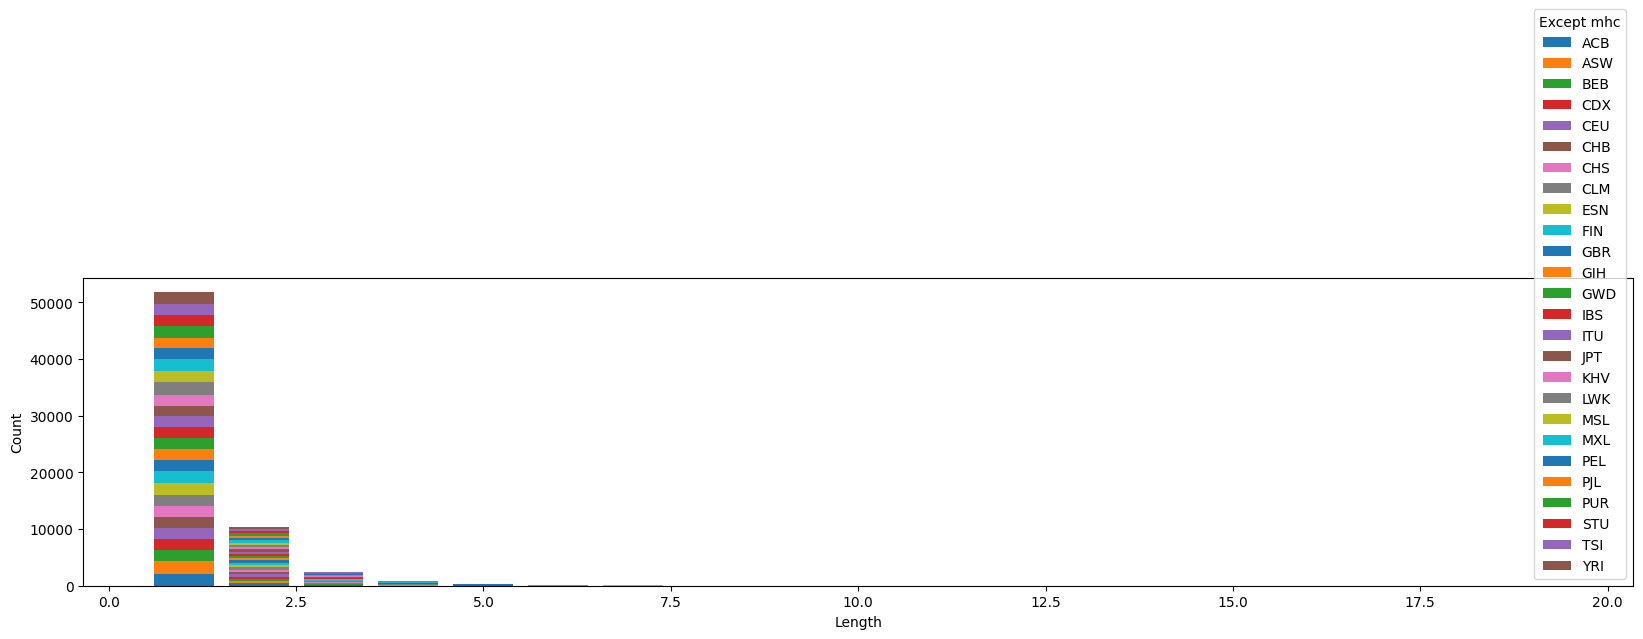

In [19]:
# 获取所有可能的x轴值
all_keys = set()
for _, subdict in race_dic_except_mhc.items():
    all_keys.update(subdict.keys())
all_keys = sorted(list(all_keys))
print(all_keys)
# 初始化堆叠的y轴数据
stacked_y_data = {key: [0] * len(all_keys) for key in race_dic_except_mhc}
print(stacked_y_data)
# 填充堆叠的y轴数据
for idx, key in enumerate(all_keys):
    for dict_key in race_dic_except_mhc:
        if key in race_dic_except_mhc[dict_key]:
            stacked_y_data[dict_key][idx] = race_dic_except_mhc[dict_key][key]
print(stacked_y_data)
# 创建堆叠柱状图
fig, ax = plt.subplots(figsize=(20,4))
bottom = np.zeros(len(all_keys))
print(bottom)
for dict_key in race_dic_except_mhc:
    ax.bar(all_keys, stacked_y_data[dict_key], label=dict_key, bottom=bottom)
    bottom += np.array(stacked_y_data[dict_key])

ax.set_xlabel("Length")
ax.set_ylabel("Count")
ax.legend(title="Except mhc")
plt.show()

In [20]:
mhc_final_dict=dict()
for curDir, dirs, files in os.walk(top="../all_race_start_length/"):
    for category in allcategories:
        mhcdic=dict()
        for file in files:   
            if file.startswith(category):
                filename=file[:file.index(".")]
                if "mhc" in filename:
                    filepath=os.path.join(curDir,file)
                    mhcdic=countNumofLength(mhcdic,filepath=filepath)
        mhc_final_dict[category]=mhcdic
                  

In [21]:
mhc_final_dict

{'ACB': {1: 6, 2: 3, 3: 3, 4: 2, 12: 1},
 'ASW': {1: 3, 2: 2, 3: 4, 8: 2, 10: 1},
 'BEB': {1: 5, 2: 3, 3: 2, 4: 1},
 'CDX': {1: 3, 2: 6, 4: 2, 7: 1},
 'CEU': {1: 5, 2: 3, 4: 1, 5: 1, 8: 1},
 'CHB': {1: 7, 2: 3, 3: 2, 4: 1},
 'CHS': {1: 3, 2: 2, 4: 1, 5: 1, 8: 1},
 'CLM': {1: 5, 2: 1, 3: 2, 4: 1, 6: 1, 9: 1},
 'ESN': {1: 3, 2: 5, 3: 5, 4: 1, 8: 1, 9: 1},
 'FIN': {1: 6, 2: 3, 3: 3},
 'GBR': {1: 6, 2: 3, 3: 1, 5: 1, 6: 1},
 'GIH': {1: 3, 2: 3, 3: 1, 4: 1, 5: 1, 7: 1},
 'GWD': {1: 5, 2: 5, 3: 3, 6: 1, 7: 1, 9: 1},
 'IBS': {1: 5, 2: 5, 6: 1, 8: 1},
 'ITU': {1: 4, 2: 3, 3: 1, 4: 2, 6: 1},
 'JPT': {1: 7, 2: 3, 3: 2, 4: 2, 9: 1},
 'KHV': {1: 4, 2: 5, 3: 1, 5: 1, 6: 1, 8: 1},
 'LWK': {1: 9, 2: 4, 3: 3, 4: 1, 9: 1},
 'MSL': {1: 1, 2: 5, 3: 1, 5: 2, 9: 2, 13: 1},
 'MXL': {1: 9, 2: 2, 3: 1, 8: 1},
 'PEL': {1: 7, 2: 4, 3: 1, 5: 1, 8: 1},
 'PJL': {1: 1, 2: 6, 5: 1},
 'PUR': {1: 6, 2: 2, 3: 3, 5: 2, 6: 1},
 'STU': {1: 4, 2: 3, 3: 2, 6: 1, 8: 1},
 'TSI': {1: 3, 2: 3, 3: 2, 7: 1},
 'YRI': {1: 5, 2: 2, 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14]
{'ACB': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'ASW': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'BEB': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'CDX': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'CEU': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'CHB': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'CHS': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'CLM': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'ESN': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'FIN': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'GBR': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'GIH': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'GWD': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'IBS': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'ITU': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'JPT': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'KHV': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'LWK': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'MSL': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'MXL': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

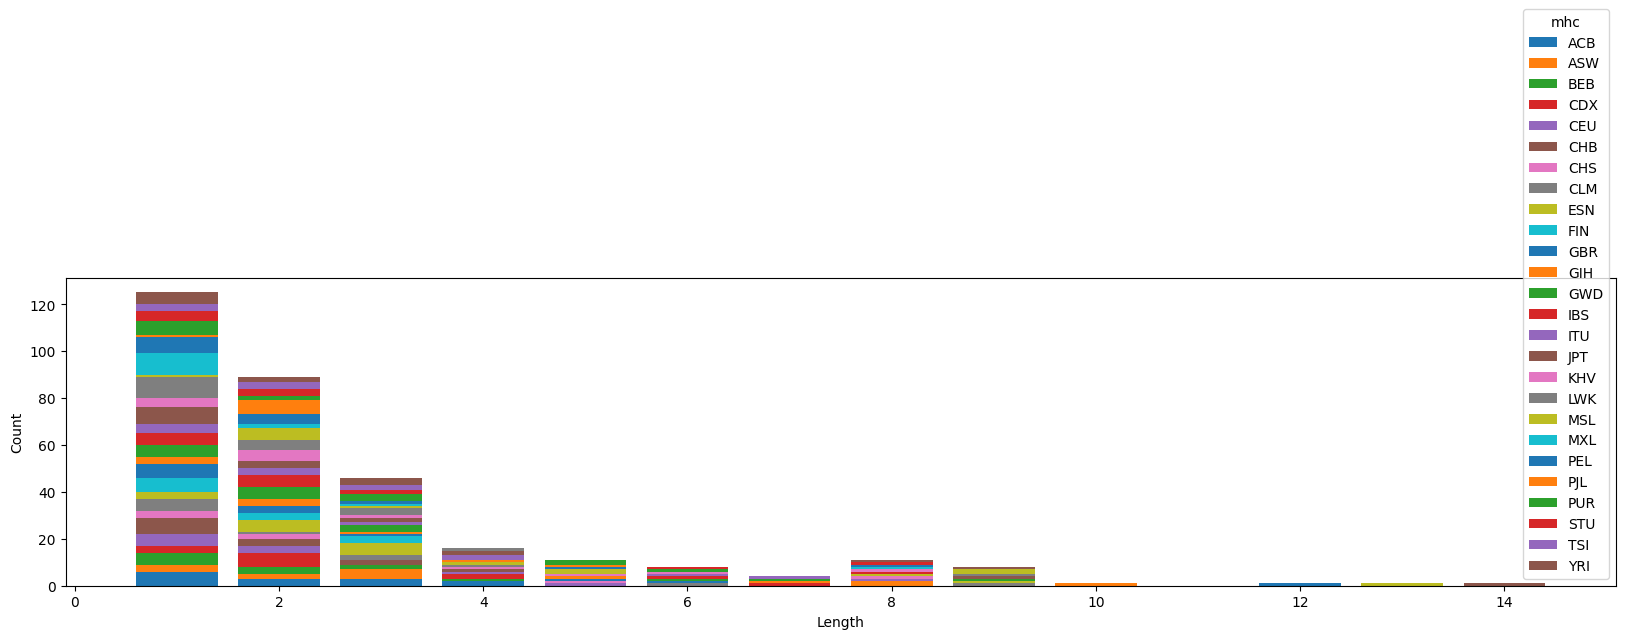

In [22]:
# 获取所有可能的x轴值
all_keys = set()
for _, subdict in mhc_final_dict.items():
    all_keys.update(subdict.keys())
all_keys = sorted(list(all_keys))
print(all_keys)
# 初始化堆叠的y轴数据
stacked_y_data = {key: [0] * len(all_keys) for key in mhc_final_dict}
print(stacked_y_data)
# 填充堆叠的y轴数据
for idx, key in enumerate(all_keys):
    for dict_key in mhc_final_dict:
        if key in mhc_final_dict[dict_key]:
            stacked_y_data[dict_key][idx] = mhc_final_dict[dict_key][key]
print(stacked_y_data)
# 创建堆叠柱状图
fig, ax = plt.subplots(figsize=(20,4))
bottom = np.zeros(len(all_keys))
print(bottom)
for dict_key in mhc_final_dict:
    ax.bar(all_keys, stacked_y_data[dict_key], label=dict_key, bottom=bottom)
    bottom += np.array(stacked_y_data[dict_key])

ax.set_xlabel("Length")
ax.set_ylabel("Count")
ax.legend(title="mhc")
plt.show()

In [23]:
# mydic=dict()
# for i in range(19):
#     mydic[i+1]=0
arr1=[]
for _,v in race_dic_except_mhc.items():
    for k2,arr in v.items():
        for i in range(arr):
            arr1.append(k2)
for _,v in mhc_final_dict.items():
    for k2,arr in v.items():
        for i in range(arr):
            arr1.append(k2)



In [24]:
# arr=[]
# for k,v in mydic.items():
#     arr.append(v)
mean_1=np.mean(arr1)
dev1=np.std(arr1)
print("mean",mean_1)
print("dev",dev1)
mid_res=stats.norm.ppf(0.9999999999,mean_1,dev1)
mid_res

mean 1.3100642980046489
dev 0.7348077849667934


5.984427106581903

In [25]:
def WithThreshold(threshold,dic):#dic={asian:{1:2,2:3,3:1},europe:{1:2,2:3,3:1}}
    larger_than_thres=0
    resultdic=dict()
    for category in allcategories:
        for i in dic[category].keys():
            if i>=threshold:
                larger_than_thres+=dic[category][i]
            resultdic[category]=larger_than_thres
    return resultdic


In [26]:
#XAAS
XAAS_with_threshold=WithThreshold(threshold=6,dic=race_dic_except_mhc)
#MHC
MHC_with_threshold=WithThreshold(threshold=6,dic=mhc_final_dict)

print(XAAS_with_threshold)
print(MHC_with_threshold)

{'ACB': 6, 'ASW': 15, 'BEB': 22, 'CDX': 33, 'CEU': 40, 'CHB': 49, 'CHS': 56, 'CLM': 67, 'ESN': 74, 'FIN': 84, 'GBR': 96, 'GIH': 102, 'GWD': 108, 'IBS': 116, 'ITU': 121, 'JPT': 128, 'KHV': 134, 'LWK': 140, 'MSL': 151, 'MXL': 162, 'PEL': 176, 'PJL': 180, 'PUR': 186, 'STU': 193, 'TSI': 202, 'YRI': 210}
{'ACB': 1, 'ASW': 4, 'BEB': 4, 'CDX': 5, 'CEU': 6, 'CHB': 6, 'CHS': 7, 'CLM': 9, 'ESN': 11, 'FIN': 11, 'GBR': 12, 'GIH': 13, 'GWD': 16, 'IBS': 18, 'ITU': 19, 'JPT': 20, 'KHV': 22, 'LWK': 23, 'MSL': 26, 'MXL': 27, 'PEL': 28, 'PJL': 28, 'PUR': 29, 'STU': 31, 'TSI': 32, 'YRI': 35}


获取region>threshold

In [27]:
#获取vcf文件中的所有位点
def getAllPositions(filepath):
    pos=[]
    #vcf_in=vcf(filepath)
    vcf_file = pysam.VariantFile(filepath)
    for record in vcf_file:
    # 处理每个位点
        pos.append(record.pos)
    pos=sorted(list(set(pos)))
    return pos

In [28]:
def findPosition(filepath,start,length):
    arr=[]
    allpos=getAllPositions(filepath=filepath)
    arr.append(allpos[start*1000])
    if (start+length)*1000-1<len(allpos):
        end=allpos[(start+length)*1000-1]
    else:
        end=allpos[-1]
    arr.append(end)
    return arr



这个文件要重新再改一下


In [29]:
#读取一个文件 确定start的index 然后得到对应文件的position
def GetPosition(filepath,threshold,res):

    csv_data = pd.read_csv(filepath, low_memory = False)#防止弹出警告
    csv_df = pd.DataFrame(csv_data)
    arr_start=np.array(csv_df['start'])
    arr_length=np.array(csv_df['length'])
    mydic=dict()
    midarr=[]
    
    for i in range(len(arr_start)):
        mydic[arr_start[i]]=arr_length[i]
#---------------------------------------------------------------------------这里要重新写一下---------------------------------------------------------
    filename_components=(filepath.split("/")[-1]).split("_start_lenth.csv")[0].split("_")
    findfoldername="split_"+filename_components[2]
    findfoldername_filename=filename_components[3]
    filepath="../"+findfoldername+"/"+findfoldername_filename+".vcf.gz"

    for k,v in mydic.items():
        if v>=threshold:
            print("filepath",filepath)
            midarr.append(findPosition(filepath=filepath,start=k,length=v))
            
        else:
            continue
    # category=filepath.split("/")[2].split("_")
    if midarr!=[]:
        res[findfoldername+"/"+findfoldername_filename]=midarr
    return res

In [30]:
#读取一个文件 确定start的index 然后得到对应文件的position
def GetPositionformhc(filepath,threshold,res):

    csv_data = pd.read_csv(filepath, low_memory = False)#防止弹出警告
    csv_df = pd.DataFrame(csv_data)
    arr_start=np.array(csv_df['start'])
    arr_length=np.array(csv_df['length'])
    mydic=dict()
    midarr=[]
    
    for i in range(len(arr_start)):
        mydic[arr_start[i]]=arr_length[i]
# #---------------------------------------------------------------------------这里要重新写一下---------------------------------------------------------
#     filename_components=(filepath.split("/")[-1]).split("_start_lenth.csv")[0].split("_")
#     findfoldername="split_"+filename_components[2]
#     findfoldername_filename=filename_components[3]
    filepath="../mhcdataset/1kgp.29720000-33130000.vcf"

    for k,v in mydic.items():
        if v>=threshold:
            print("filepath",filepath)
            midarr.append(findPosition(filepath=filepath,start=k,length=v))
            
        else:
            continue
    # category=filepath.split("/")[2].split("_")
    if midarr!=[]:
        res["mhc"]=midarr
    return res

In [31]:
# def getPositionforMHC(filepath):
#     mhc_start_length_path="../"
#     csv_data = pd.read_csv(mhc_start_length_path, low_memory = False)#防止弹出警告
#     csv_df = pd.DataFrame(csv_data)
#     arr_start=np.array(csv_df['start'])
#     arr_length=np.array(csv_df['length'])
#     mydic=dict()
#     midarr=[]
#     for i in range(len(arr_start)):
#         mydic[arr_start[i]]=arr_length[i]
#     for k,v in mydic.items():
#         if v>=6:
#             midarr.append(findPosition(filepath="../data_mhc/1kgp.29720000-33130000.vcf",start=k,length=v))            
#         else:
#             continue
#     res["MHC"]=midarr
#     return res
            



In [32]:
all_race_positons=dict()
for category in allcategories:
    all_race_positons[category]=dict()

for curDir, dirs, files in os.walk(top="../all_race_start_length/"):        
    for category in allcategories:
        res=dict()
        for file in files:
            filename=file[:file.index(".")]
            if "mhc" in filename:
                continue
            else:
                filerace=filename.split("_")[0]
                if filerace==category:                   
                    filepath=os.path.join(curDir,file)
                    res=GetPosition(filepath=filepath,threshold=6,res=res)
                    all_race_positons[category]=res


filepath ../split_chr2/xau.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xau.vcf.gz'


filepath ../split_chr5/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr5/xaa.vcf.gz'


filepath ../split_chr7/xan.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xan.vcf.gz'


filepath ../split_chr11/xaw.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr11/xaw.vcf.gz'


filepath ../split_chr14/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xaa.vcf.gz'


filepath ../split_chr21/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr21/xaa.vcf.gz'


filepath ../split_chr2/xau.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xau.vcf.gz'


filepath ../split_chr5/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr5/xaa.vcf.gz'


filepath ../split_chr9/xak.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr9/xak.vcf.gz'


filepath ../split_chr10/xaj.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr10/xaj.vcf.gz'


filepath ../split_chr10/xaj.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr10/xaj.vcf.gz'


filepath ../split_chr11/xaf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr11/xaf.vcf.gz'


filepath ../split_chr13/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr13/xaa.vcf.gz'


filepath ../split_chr14/xak.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xak.vcf.gz'


filepath ../split_chr21/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr21/xaa.vcf.gz'


filepath ../split_chr1/xbx.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr1/xbx.vcf.gz'


filepath ../split_chr2/xan.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xan.vcf.gz'


filepath ../split_chr3/xav.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xav.vcf.gz'


filepath ../split_chr3/xbf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xbf.vcf.gz'


filepath ../split_chr4/xaz.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr4/xaz.vcf.gz'


filepath ../split_chr13/xai.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr13/xai.vcf.gz'


filepath ../split_chr14/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xaa.vcf.gz'


filepath ../split_chr1/xay.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr1/xay.vcf.gz'


filepath ../split_chr2/xbd.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xbd.vcf.gz'


filepath ../split_chr4/xba.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr4/xba.vcf.gz'


filepath ../split_chr6/xao.vcf.gz
filepath ../split_chr7/xaf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xaf.vcf.gz'


filepath ../split_chr9/xau.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr9/xau.vcf.gz'


filepath ../split_chr10/xan.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr10/xan.vcf.gz'


filepath ../split_chr12/xbc.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xbc.vcf.gz'


filepath ../split_chr13/xai.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr13/xai.vcf.gz'


filepath ../split_chr17/xag.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr17/xag.vcf.gz'


filepath ../split_chr18/xan.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr18/xan.vcf.gz'


filepath ../split_chr1/xbe.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr1/xbe.vcf.gz'


filepath ../split_chr6/xac.vcf.gz
filepath ../split_chr7/xbc.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xbc.vcf.gz'


filepath ../split_chr11/xaf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr11/xaf.vcf.gz'


filepath ../split_chr12/xac.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xac.vcf.gz'


filepath ../split_chr17/xaf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr17/xaf.vcf.gz'


filepath ../split_chr17/xaj.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr17/xaj.vcf.gz'


filepath ../split_chr2/xbd.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xbd.vcf.gz'


filepath ../split_chr4/xba.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr4/xba.vcf.gz'


filepath ../split_chr4/xaz.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr4/xaz.vcf.gz'


filepath ../split_chr6/xao.vcf.gz
filepath ../split_chr7/xbc.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xbc.vcf.gz'


filepath ../split_chr7/xaf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xaf.vcf.gz'


filepath ../split_chr10/xar.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr10/xar.vcf.gz'


filepath ../split_chr11/xav.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr11/xav.vcf.gz'


filepath ../split_chr22/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr22/xaa.vcf.gz'


filepath ../split_chr3/xav.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xav.vcf.gz'


filepath ../split_chr4/xba.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr4/xba.vcf.gz'


filepath ../split_chr5/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr5/xaa.vcf.gz'


filepath ../split_chr6/xao.vcf.gz
filepath ../split_chr7/xbc.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xbc.vcf.gz'


filepath ../split_chr8/xaz.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr8/xaz.vcf.gz'


filepath ../split_chr14/xat.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xat.vcf.gz'


filepath ../split_chr1/xbd.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr1/xbd.vcf.gz'


filepath ../split_chr3/xav.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xav.vcf.gz'


filepath ../split_chr3/xav.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xav.vcf.gz'


filepath ../split_chr3/xbj.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xbj.vcf.gz'


filepath ../split_chr4/xba.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr4/xba.vcf.gz'


filepath ../split_chr6/xab.vcf.gz
filepath ../split_chr6/xar.vcf.gz
filepath ../split_chr7/xbc.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xbc.vcf.gz'


filepath ../split_chr12/xan.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xan.vcf.gz'


filepath ../split_chr14/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xaa.vcf.gz'


filepath ../split_chr14/xat.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xat.vcf.gz'


filepath ../split_chr2/xau.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xau.vcf.gz'


filepath ../split_chr5/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr5/xaa.vcf.gz'


filepath ../split_chr5/xai.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr5/xai.vcf.gz'


filepath ../split_chr6/xbf.vcf.gz
filepath ../split_chr7/xap.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xap.vcf.gz'


filepath ../split_chr14/xan.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xan.vcf.gz'


filepath ../split_chr21/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr21/xaa.vcf.gz'


filepath ../split_chr3/xbj.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xbj.vcf.gz'


filepath ../split_chr4/xaw.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr4/xaw.vcf.gz'


filepath ../split_chr4/xbh.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr4/xbh.vcf.gz'


filepath ../split_chr6/xat.vcf.gz
filepath ../split_chr6/xbf.vcf.gz
filepath ../split_chr7/xbc.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xbc.vcf.gz'


filepath ../split_chr8/xaz.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr8/xaz.vcf.gz'


filepath ../split_chr9/xav.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr9/xav.vcf.gz'


filepath ../split_chr11/xbb.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr11/xbb.vcf.gz'


filepath ../split_chr18/xac.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr18/xac.vcf.gz'


filepath ../split_chr1/xak.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr1/xak.vcf.gz'


filepath ../split_chr2/xan.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xan.vcf.gz'


filepath ../split_chr2/xas.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xas.vcf.gz'


filepath ../split_chr3/xbf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xbf.vcf.gz'


filepath ../split_chr3/xbi.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xbi.vcf.gz'


filepath ../split_chr4/xba.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr4/xba.vcf.gz'


filepath ../split_chr6/xac.vcf.gz
filepath ../split_chr7/xbc.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xbc.vcf.gz'


filepath ../split_chr11/xbb.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr11/xbb.vcf.gz'


filepath ../split_chr12/xac.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xac.vcf.gz'


filepath ../split_chr17/xaf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr17/xaf.vcf.gz'


filepath ../split_chr17/xaj.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr17/xaj.vcf.gz'


filepath ../split_chr3/xav.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xav.vcf.gz'


filepath ../split_chr4/xbd.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr4/xbd.vcf.gz'


filepath ../split_chr6/xac.vcf.gz
filepath ../split_chr11/xah.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr11/xah.vcf.gz'


filepath ../split_chr14/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xaa.vcf.gz'


filepath ../split_chr18/xac.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr18/xac.vcf.gz'


filepath ../split_chr1/xak.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr1/xak.vcf.gz'


filepath ../split_chr2/xai.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xai.vcf.gz'


filepath ../split_chr2/xau.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xau.vcf.gz'


filepath ../split_chr5/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr5/xaa.vcf.gz'


filepath ../split_chr13/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr13/xaa.vcf.gz'


filepath ../split_chr21/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr21/xaa.vcf.gz'


filepath ../split_chr3/xbf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xbf.vcf.gz'


filepath ../split_chr6/xbf.vcf.gz
filepath ../split_chr12/xac.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xac.vcf.gz'


filepath ../split_chr12/xas.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xas.vcf.gz'


filepath ../split_chr17/xaf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr17/xaf.vcf.gz'


filepath ../split_chr17/xaj.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr17/xaj.vcf.gz'


filepath ../split_chr18/xac.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr18/xac.vcf.gz'


filepath ../split_chr22/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr22/xaa.vcf.gz'


filepath ../split_chr5/xas.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr5/xas.vcf.gz'


filepath ../split_chr10/xan.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr10/xan.vcf.gz'


filepath ../split_chr12/xac.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xac.vcf.gz'


filepath ../split_chr14/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xaa.vcf.gz'


filepath ../split_chr17/xak.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr17/xak.vcf.gz'


filepath ../split_chr3/xav.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xav.vcf.gz'


filepath ../split_chr5/xbc.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr5/xbc.vcf.gz'


filepath ../split_chr5/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr5/xaa.vcf.gz'


filepath ../split_chr13/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr13/xaa.vcf.gz'


filepath ../split_chr13/xap.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr13/xap.vcf.gz'


filepath ../split_chr14/xad.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xad.vcf.gz'


filepath ../split_chr22/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr22/xaa.vcf.gz'


filepath ../split_chr2/xbq.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xbq.vcf.gz'


filepath ../split_chr3/xav.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xav.vcf.gz'


filepath ../split_chr3/xbj.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xbj.vcf.gz'


filepath ../split_chr4/xba.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr4/xba.vcf.gz'


filepath ../split_chr7/xbc.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xbc.vcf.gz'


filepath ../split_chr14/xak.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xak.vcf.gz'


filepath ../split_chr2/xai.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xai.vcf.gz'


filepath ../split_chr2/xau.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xau.vcf.gz'


filepath ../split_chr5/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr5/xaa.vcf.gz'


filepath ../split_chr13/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr13/xaa.vcf.gz'


filepath ../split_chr14/xak.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xak.vcf.gz'


filepath ../split_chr21/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr21/xaa.vcf.gz'


filepath ../split_chr1/xak.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr1/xak.vcf.gz'


filepath ../split_chr2/xau.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xau.vcf.gz'


filepath ../split_chr5/xay.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr5/xay.vcf.gz'


filepath ../split_chr7/xaf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xaf.vcf.gz'


filepath ../split_chr7/xap.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xap.vcf.gz'


filepath ../split_chr9/xak.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr9/xak.vcf.gz'


filepath ../split_chr11/xaf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr11/xaf.vcf.gz'


filepath ../split_chr11/xaw.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr11/xaw.vcf.gz'


filepath ../split_chr13/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr13/xaa.vcf.gz'


filepath ../split_chr14/xat.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xat.vcf.gz'


filepath ../split_chr21/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr21/xaa.vcf.gz'


filepath ../split_chr3/xav.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xav.vcf.gz'


filepath ../split_chr3/xaq.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xaq.vcf.gz'


filepath ../split_chr5/xad.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr5/xad.vcf.gz'


filepath ../split_chr6/xao.vcf.gz
filepath ../split_chr7/xbc.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xbc.vcf.gz'


filepath ../split_chr11/xaf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr11/xaf.vcf.gz'


filepath ../split_chr12/xad.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xad.vcf.gz'


filepath ../split_chr12/xac.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xac.vcf.gz'


filepath ../split_chr12/xap.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xap.vcf.gz'


filepath ../split_chr12/xas.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xas.vcf.gz'


filepath ../split_chr17/xaf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr17/xaf.vcf.gz'


filepath ../split_chr1/xak.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr1/xak.vcf.gz'


filepath ../split_chr2/xbo.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xbo.vcf.gz'


filepath ../split_chr3/xav.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xav.vcf.gz'


filepath ../split_chr3/xba.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xba.vcf.gz'


filepath ../split_chr4/xaq.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr4/xaq.vcf.gz'


filepath ../split_chr6/xab.vcf.gz
filepath ../split_chr8/xba.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr8/xba.vcf.gz'


filepath ../split_chr10/xaq.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr10/xaq.vcf.gz'


filepath ../split_chr11/xaf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr11/xaf.vcf.gz'


filepath ../split_chr11/xam.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr11/xam.vcf.gz'


filepath ../split_chr12/xac.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xac.vcf.gz'


filepath ../split_chr12/xas.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xas.vcf.gz'


filepath ../split_chr14/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xaa.vcf.gz'


filepath ../split_chr16/xab.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr16/xab.vcf.gz'


filepath ../split_chr12/xac.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xac.vcf.gz'


filepath ../split_chr14/xac.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xac.vcf.gz'


filepath ../split_chr14/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xaa.vcf.gz'


filepath ../split_chr17/xak.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr17/xak.vcf.gz'


filepath ../split_chr3/xav.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xav.vcf.gz'


filepath ../split_chr3/xbj.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xbj.vcf.gz'


filepath ../split_chr12/xac.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xac.vcf.gz'


filepath ../split_chr12/xan.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xan.vcf.gz'


filepath ../split_chr12/xas.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xas.vcf.gz'


filepath ../split_chr17/xaf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr17/xaf.vcf.gz'


filepath ../split_chr3/xav.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr3/xav.vcf.gz'


filepath ../split_chr7/xbc.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xbc.vcf.gz'


filepath ../split_chr13/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr13/xaa.vcf.gz'


filepath ../split_chr13/xai.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr13/xai.vcf.gz'


filepath ../split_chr14/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xaa.vcf.gz'


filepath ../split_chr16/xaj.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr16/xaj.vcf.gz'


filepath ../split_chr19/xam.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr19/xam.vcf.gz'


filepath ../split_chr4/xaw.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr4/xaw.vcf.gz'


filepath ../split_chr4/xba.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr4/xba.vcf.gz'


filepath ../split_chr7/xag.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xag.vcf.gz'


filepath ../split_chr7/xbc.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xbc.vcf.gz'


filepath ../split_chr9/xai.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr9/xai.vcf.gz'


filepath ../split_chr12/xac.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr12/xac.vcf.gz'


filepath ../split_chr14/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr14/xaa.vcf.gz'


filepath ../split_chr17/xaf.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr17/xaf.vcf.gz'


filepath ../split_chr17/xaj.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr17/xaj.vcf.gz'


filepath ../split_chr2/xau.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr2/xau.vcf.gz'


filepath ../split_chr5/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr5/xaa.vcf.gz'


filepath ../split_chr7/xan.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xan.vcf.gz'


filepath ../split_chr7/xap.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr7/xap.vcf.gz'


filepath ../split_chr9/xak.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr9/xak.vcf.gz'


filepath ../split_chr13/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr13/xaa.vcf.gz'


filepath ../split_chr16/xao.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr16/xao.vcf.gz'


filepath ../split_chr21/xaa.vcf.gz


[E::idx_find_and_load] Could not retrieve index file for '../split_chr21/xaa.vcf.gz'


In [33]:
with open('../alldicts/all_race_positions.csv', 'w') as f:
    [f.write('{0},{1}\n'.format(key, value)) for key, value in all_race_positons.items()]


In [34]:
all_race_positons

{'ACB': {'split_chr2/xau': [[89762579, 89852967]],
  'split_chr5/xaa': [[676694, 846549]],
  'split_chr7/xan': [[56467013, 56713542]],
  'split_chr11/xaw': [[103206633, 103451621]],
  'split_chr14/xaa': [[19806333, 19976578]],
  'split_chr21/xaa': [[10605321, 10733724]]},
 'ASW': {'split_chr2/xau': [[89762579, 89852967]],
  'split_chr5/xaa': [[676694, 846549]],
  'split_chr9/xak': [[42796452, 42969270]],
  'split_chr10/xaj': [[38491573, 38687800], [38725237, 38832458]],
  'split_chr11/xaf': [[23272931, 23495433]],
  'split_chr13/xaa': [[18347994, 18534139]],
  'split_chr14/xak': [[66346187, 66752333]],
  'split_chr21/xaa': [[10605321, 10733724]]},
 'BEB': {'split_chr1/xbx': [[245939605, 246162003]],
  'split_chr2/xan': [[56405225, 56644106]],
  'split_chr3/xav': [[98046342, 98273693]],
  'split_chr3/xbf': [[145365797, 145612467]],
  'split_chr4/xaz': [[115247002, 115485969]],
  'split_chr13/xai': [[55102733, 55443491]],
  'split_chr14/xaa': [[19806333, 19976578]]},
 'CDX': {'split_chr1

In [35]:
# mhc_race_positons=dict()
# for category in allcategories:
#     mhc_race_positons[category]=dict()

# for curDir, dirs, files in os.walk(top="../all_race_start_length/"):
#     for file in files:
#         filename=file[:file.index(".")]
#         if "mhc" in filename:
            

In [36]:
mhc_race_positons=dict()
for category in allcategories:
    mhc_race_positons[category]=dict()

for curDir, dirs, files in os.walk(top="../all_race_start_length/"):        
    for category in allcategories:
        res=dict()
        for file in files:
            filename=file[:file.index(".")]
            if "mhc" in filename:
                filerace=filename.split("_")[0]
                if filerace==category:                   
                    filepath=os.path.join(curDir,file)
                    print(filepath)
                    res=GetPositionformhc(filepath=filepath,threshold=6,res=res)
                    mhc_race_positons[category]=res
                else:
                    continue
            else:
                continue


../all_race_start_length/ACB_mhc_start_lenth.csv
filepath ../mhcdataset/1kgp.29720000-33130000.vcf
../all_race_start_length/ASW_mhc_start_lenth.csv
filepath ../mhcdataset/1kgp.29720000-33130000.vcf
filepath ../mhcdataset/1kgp.29720000-33130000.vcf
filepath ../mhcdataset/1kgp.29720000-33130000.vcf
../all_race_start_length/BEB_mhc_start_lenth.csv
../all_race_start_length/CDX_mhc_start_lenth.csv
filepath ../mhcdataset/1kgp.29720000-33130000.vcf
../all_race_start_length/CEU_mhc_start_lenth.csv
filepath ../mhcdataset/1kgp.29720000-33130000.vcf
../all_race_start_length/CHB_mhc_start_lenth.csv
../all_race_start_length/CHS_mhc_start_lenth.csv
filepath ../mhcdataset/1kgp.29720000-33130000.vcf
../all_race_start_length/CLM_mhc_start_lenth.csv
filepath ../mhcdataset/1kgp.29720000-33130000.vcf
filepath ../mhcdataset/1kgp.29720000-33130000.vcf
../all_race_start_length/ESN_mhc_start_lenth.csv
filepath ../mhcdataset/1kgp.29720000-33130000.vcf
filepath ../mhcdataset/1kgp.29720000-33130000.vcf
../all_ra

In [37]:
mhc_race_positons

{'ACB': {'mhc': [[32589647, 32805573]]},
 'ASW': {'mhc': [[29753369, 29913914],
   [29939668, 30120966],
   [32627859, 32843772]]},
 'BEB': {},
 'CDX': {'mhc': [[31295439, 31432528]]},
 'CEU': {'mhc': [[32627859, 32776791]]},
 'CHB': {},
 'CHS': {'mhc': [[32589647, 32716541]]},
 'CLM': {'mhc': [[32453110, 32577355], [32589647, 32732048]]},
 'ESN': {'mhc': [[29720403, 29896285], [32644320, 32843772]]},
 'FIN': {},
 'GBR': {'mhc': [[32453110, 32577355]]},
 'GIH': {'mhc': [[32589647, 32698571]]},
 'GWD': {'mhc': [[29720403, 29913914],
   [29939668, 30085606],
   [32627859, 32732048]]},
 'IBS': {'mhc': [[32453110, 32577355], [32589647, 32716541]]},
 'ITU': {'mhc': [[32423532, 32554290]]},
 'JPT': {'mhc': [[32589647, 32732048]]},
 'KHV': {'mhc': [[32453110, 32577355], [32589647, 32716541]]},
 'LWK': {'mhc': [[32627859, 32805573]]},
 'MSL': {'mhc': [[29720403, 29913914],
   [31317765, 31528792],
   [32554291, 32776791]]},
 'MXL': {'mhc': [[32589647, 32716541]]},
 'PEL': {'mhc': [[32473902, 3

In [38]:
with open('../alldicts/mhc_race_positions.csv', 'w') as f:
    [f.write('{0},{1}\n'.format(key, value)) for key, value in mhc_race_positons.items()]

In [9]:
def compareWith0_01Pvalue2(mean_arr,std_arr,filename,filepath):

    arr=[]
    csv_matrix = np.loadtxt(open(filepath,"rb"),delimiter=",",skiprows=0)
    for i in range(len(csv_matrix)):
        mid_res=stats.norm.cdf(csv_matrix[i], mean_arr, std_arr)

        if mid_res>0.95:
            arr.append(1)
        else:
            arr.append(0)
    np.savetxt("../yeah/"+filename+".csv", arr, delimiter = ',')
    return filename

In [10]:

mean_dict_different_race={'ACB': -0.014011151662888553,
 'ASW': -0.012693412503283,
 'BEB': -0.0038608773522230016,
 'CDX': -0.000870975201046489,
 'CEU': -0.002626550761399808,
 'CHB': -0.000840617782511786,
 'CHS': -0.0016030210248706835,
 'CLM': -0.006497201413442441,
 'ESN': -0.012407888605124987,
 'FIN': -0.0013888123211964092,
 'GBR': -0.0016421960521901954,
 'GIH': -0.0029655045615120147,
 'GWD': -0.013383054011719266,
 'IBS': -0.0036274568161741316,
 'ITU': -0.003697573961398361,
 'JPT': -0.0004422965646677968,
 'KHV': -0.0014824412579579188,
 'LWK': -0.013214685221562708,
 'MSL': -0.012902619299438558,
 'MXL': -0.004064132377929528,
 'PEL': -0.0032051883341473507,
 'PJL': -0.004661546996727815,
 'PUR': -0.008252100717713692,
 'STU': -0.003961436794723387,
 'TSI': -0.002358177545570631,
 'YRI': -0.012978184004079407}
std_dict_different_race={'ACB': 0.007679014864719199,
 'ASW': 0.008041527656473924,
 'BEB': 0.008061181937627181,
 'CDX': 0.008574772155886829,
 'CEU': 0.007805712926154353,
 'CHB': 0.00858396197930932,
 'CHS': 0.008210661522162982,
 'CLM': 0.007855389049385354,
 'ESN': 0.007528169549036397,
 'FIN': 0.008233373830804186,
 'GBR': 0.008280482586380011,
 'GIH': 0.008318428884896655,
 'GWD': 0.00741808675422558,
 'IBS': 0.007946168606506706,
 'ITU': 0.007944085877932789,
 'JPT': 0.008520600208015637,
 'KHV': 0.008457471872578115,
 'LWK': 0.00775427047797345,
 'MSL': 0.00788405338804666,
 'MXL': 0.008244211463289736,
 'PEL': 0.008220014590454098,
 'PJL': 0.007728364636381623,
 'PUR': 0.007789028974214059,
 'STU': 0.007989081367465312,
 'TSI': 0.008171487042712589,
 'YRI': 0.007574843363674686}

In [11]:
for curDir, dirs, files in os.walk(top="../allrace_bin_1000_Average_WithoutX/"):
    for file in files:   
        for category in allcategories:
            if file.startswith(category):
                filename=file[:file.index(".")]
                filepath=os.path.join(curDir,file)
                #print(filepath)
                compareWith0_01Pvalue2(mean_arr=mean_dict_different_race[category],std_arr=std_dict_different_race[category],filename=filename,filepath=filepath)